In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io
from astropy.io import fits
import pandas as pd
from astropy import wcs
from astropy.coordinates import SkyCoord
import pickle
import math
from scipy.optimize import curve_fit
from tqdm import tqdm
from astropy import units as u
from astropy.coordinates import (SkyCoord, Distance, Galactic, 
                                 EarthLocation, AltAz)
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Calling in the data files that we made in the previous Notebook (Ammonia Velocities)

In [2]:
with open('spines_coordinates.pkl', 'rb') as f:
    coordinates_info = pickle.load(f)
    
display(coordinates_info)

long = np.array(coordinates_info['Galactic Longitude'])
lat = np.array(coordinates_info['Galactic Latitude'])

#df = pd.DataFrame(data = {'Longitude': long})
#df_sorted = df.sort_values(by=['y', 'x'])
#df_sorted

lon_sorted = []
lat_sorted = []
for i in range(len(long)):
    df = pd.DataFrame(data={'Galactic Longitude': long[i],
                            'Galactic Latitude': lat[i]})
    df_sorted = df.sort_values(by=['Galactic Longitude', 'Galactic Latitude'])
    #display(df_sorted)
    
    lon_sorted.append(np.array(df_sorted['Galactic Longitude']))
    lat_sorted.append(np.array(df_sorted['Galactic Latitude']))

,Galactic Longitude,Galactic Latitude,Identification
0,"[1374.6049467614898, 1374.9450540956511, 1375....","[63.57339090692949, 63.20771265444819, 62.8420...",0
1,"[1263.3381744429716, 1263.3645154316564, 1263....","[86.97954658819435, 87.68613158724656, 88.0267...",1
2,"[1358.6537616343378, 1359.020231526174, 1359.3...","[110.12334380739776, 110.46423674785001, 110.8...",2
3,"[1965.525957507919, 1965.5523176464797, 1965.2...","[277.825780449537, 278.5324947562531, 279.6032...",4
4,"[668.2471173143755, 668.5870864210632, 669.267...","[263.72164696882646, 263.3540672319541, 262.61...",6
...,...,...,...
115,"[1968.787054452166, 1969.1271803518923, 1969.4...","[498.4703562376144, 498.1063338146778, 497.742...",259
116,"[1126.2332568344102, 1126.5733606602628, 1126....","[166.9861120238238, 166.61973196621875, 167.32...",261
117,"[728.937727262834, 729.3040041652002, 730.0102...","[298.04256233269734, 298.38149718151726, 298.3...",262
118,"[2000.9821717159416, 2001.3222307293531, 2002....","[280.3002251146281, 279.9363308769407, 279.915...",264


In [3]:
path = 'velocity_grid.fits'
cube = fits.open(path)
velocity_grid_data = cube[0].data
header = cube[0].header
#print(header)

wcs_vel_grid = wcs.WCS(header)

print(wcs_vel_grid)
print(velocity_grid_data.shape)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SFL' 'GLAT-SFL' 'v' 
CRVAL : np.float64(170.233333333) np.float64(0.0) np.float64(4.1100502434622) 
CRPIX : np.float64(1100.0) np.float64(9785.0) np.float64(0.0) 
PC1_1 PC1_2 PC1_3  : np.float64(1.0) np.float64(0.0) np.float64(0.0) 
PC2_1 PC2_2 PC2_3  : np.float64(0.0) np.float64(1.0) np.float64(0.0) 
PC3_1 PC3_2 PC3_3  : np.float64(0.0) np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-0.001666666707) np.float64(0.001666666707) np.float64(0.020100486924401) 
NAXIS : 2200  800
(800, 2200)


In [4]:
list_ = open("Seo_NH3_peaks.txt").read().split()
strings = list_[4:]
ra_strings = []
dec_strings = []
for i in range(39):
    ra_strings.append(strings[i*3])
    dec_strings.append(strings[i*3+1])

#print(ra_strings)

ra = []
dec = []
for i in range(39):
    ra_val = ra_strings[i]
    ra_value = float(ra_val[0])*15 + 15*float(ra_val[2:4])/60 + 15*float(ra_val[5:11])/3600
    ra.append(ra_value)

    dec_val = dec_strings[i]
    dec_value = float(dec_val[0:2]) + float(dec_val[3:5])/60 + float(dec_val[6:11])/3600
    dec.append(dec_value)

c = SkyCoord(ra, dec, frame='icrs', unit='deg')
galactic_coords = c.galactic

lon_nh3 = np.array(galactic_coords.l*u.degree)
lat_nh3 = np.array(galactic_coords.b*u.degree)

#print(lon, lat)

c = SkyCoord(lon_nh3, lat_nh3, frame='galactic', unit='deg')

pixels_x, pixels_y = astropy.wcs.utils.skycoord_to_pixel(c, wcs = wcs_vel_grid, origin=1)

print(pixels_x, pixels_y)

[1983.00099567 1977.00659142 1940.99932345 1931.00363939 1989.00429432
 1929.99552784 1901.00804597 1876.00148288 1856.0095826  1950.00173594
 1946.99592993 1920.0007664  1910.00581401 1898.00170899 1885.01048549
 1886.00883825 1813.02218266 1634.00871187 1632.00542148 1625.99943055
 1372.00506531 1354.99658538 1333.00722484 1305.00667122 1286.9984637
 1265.00556649 1242.00501774 1233.99762268 1217.00469284 1131.99829133
 1144.0045607  1149.99806787 1080.99658352 1106.99532831  638.0112226
  640.00320992  192.99502458  193.00604716  178.99681463] [503.00103732 498.00251159 482.00191129 493.00227809 422.00112205
 332.00180131 334.00185691 314.00223772 305.00220364 305.00271873
 343.00134712 289.00119797 281.00136666 272.00286091 254.00103804
 240.00150939 213.98527211 110.00099362 106.00107325  91.00089752
  82.00186974 108.00235488 104.00157711 105.0022492  107.00191761
 123.0013344  117.00121544 102.0010991   96.00281616 160.0022528
 138.00167838 151.00283848 171.00124395 167.0028346 

/home/ljsteffes/.venv/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/ljsteffes/.venv/lib/python3.12/site-packages/matplotlib/axes/_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


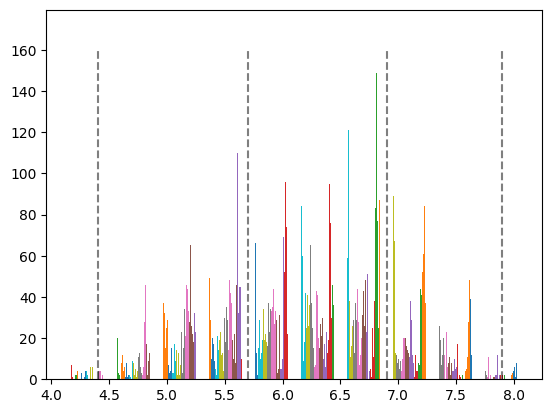

In [5]:
plt.hist(velocity_grid_data)
#plt.grid()

plt.vlines(4.4, 0, 160, colors = 'black', linestyle = 'dashed', alpha = 0.5)
plt.vlines(5.7, 0, 160, colors = 'black', linestyle = 'dashed', alpha = 0.5)
plt.vlines(6.9, 0, 160, colors = 'black', linestyle = 'dashed', alpha = 0.5)
plt.vlines(7.9, 0, 160, colors = 'black', linestyle = 'dashed', alpha = 0.5)

plt.savefig('Figures/Velocity_Histogram.png', bbox_inches = 'tight')

## Setting up the figure that we want to analyze

In [6]:
closest_spine = []
for i in tqdm(range(len(pixels_x))):
    minimum_distances = []
    for j in range(len(long)):
        dist = np.sqrt((long[j] - pixels_x[i])**2 + (lat[j] - pixels_y[i])**2)
        minimum_distances.append(np.min(dist))
    closest_spine.append(minimum_distances.index(np.min(minimum_distances)))

print(closest_spine)

100%|█████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 2379.70it/s]

[14, 14, 65, 6, 32, 12, 12, 33, 33, 3, 42, 77, 63, 63, 16, 16, 28, 18, 102, 102, 0, 1, 1, 1, 1, 8, 8, 101, 101, 29, 113, 38, 35, 35, 107, 91, 27, 27, 9]


/tmp/ipykernel_820754/2407768250.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('bwr')


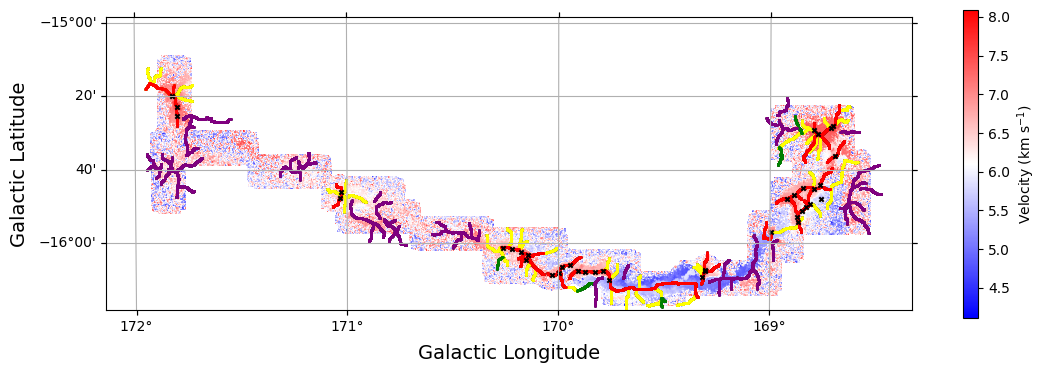

In [7]:
plt.figure(figsize = [13,4])
ax = plt.subplot(projection=wcs_vel_grid, slices=('x', 'y', 0))
cm = plt.cm.get_cmap('bwr')
vel_map = ax.imshow(velocity_grid_data, origin = 'lower', cmap = cm)
for i in range(len(long)):
    ax.scatter(long[i], lat[i], s = 1, color = 'black')

#a = 107
#ax.scatter(long[a], lat[a], s= 1, color = 'red')

#class1 = [0, 1, 6, 7, 8, 9, 12, 14, 15, 16, 18, 27, 28, 29, 32, 33, 35, 42, 63, 77, 91, 99, 101, 102, 107]
         #[0, 1, 3, 6, 8, 9, 12, 14, 16, 18, 27, 28, 29, 32, 33, 35, 38, 42, 63, 65, 77, 91, 101, 102, 107, 113]
class1 = [0, 1, 6, 8, 9, 12, 14, 16, 18, 27, 28, 29, 32, 33, 35, 38, 42, 63, 65, 77, 91, 101, 102, 107, 113]
class2 = [2, 3, 7, 9, 15, 17, 26, 28, 30, 34, 36, 39, 41, 48, 52, 54, 56, 58, 68, 69, 70, 72, 77, 78, 79, 80, 82, 85, 86, 87, 93, 96, 97, 98, 99, 100, 
          111, 114, 115, 116, 119]
class3 = [57, 67, 73, 106, 109]
class4 = [4, 5, 10, 11, 13, 19, 20, 21, 22, 23, 24, 25, 31, 37, 40, 43, 44, 45, 46, 47, 49, 50, 51, 53, 55, 59, 60, 61, 62, 64, 66, 71, 74, 75, 76, 81, 
          83, 84, 88, 89, 90, 92, 94, 95, 103, 104, 105, 108, 110, 112, 117, 118]

for i in class2:
    ax.scatter(long[i], lat[i], s = 1, color = 'yellow')
for i in class3:
    ax.scatter(long[i], lat[i], s = 1, color = 'green')
for i in class4:
    ax.scatter(long[i], lat[i], s = 1, color = 'purple')
for i in class1:
    ax.scatter(long[i], lat[i], s = 1, color = 'red')
#ax.scatter(long[118], lat[118], s = 1, color = 'blue')

plt.scatter(pixels_x, pixels_y, s = 10, color = 'black', marker = 'x')
plt.colorbar(vel_map, label = r'Velocity (km s$^{-1}$)')
plt.grid()
#plt.xlim(0, 2200)
#plt.ylim(0, 800)

plt.grid()
plt.xlabel('Galactic Longitude', fontsize = 14)
plt.ylabel('Galactic Latitude', fontsize = 14)
plt.savefig('Figures/velocity_map_spines_classes.png', transparent=True, bbox_inches = 'tight')

### Find the closest spine to each of the dense cores

In order to analyze the gradients on a scale of the different types of spines, I broke the spines up into different rankings. They still need a bit of work, but the idea is to then make a distance transform with the class 1 spines and eventually the other ones too.

### Take all of the pixels from the spines and put them into individual pixels with integers

In [10]:
rounded_l_pix = []
rounded_b_pix = []

for i in range(len(long)):
    rounded_lon = []
    rounded_lat = []
    for j in range(len(long[i])):
        rounded_lon.append(round(long[i][j]))
        rounded_lat.append(round(lat[i][j]))
        
    rounded_l_pix.append(rounded_lon)
    rounded_b_pix.append(rounded_lat)
        
print(len(rounded_l_pix), len(rounded_b_pix))

rounded_l_pix_class1 = []
rounded_b_pix_class1 = []

rounded_l_pix_class2 = []
rounded_b_pix_class2 = []

rounded_l_pix_class3 = []
rounded_b_pix_class3 = []

rounded_l_pix_class4 = []
rounded_b_pix_class4 = []

for i in range(len(rounded_l_pix)):
    if i in class1:
        rounded_l_pix_class1.append(rounded_l_pix[i])
        rounded_b_pix_class1.append(rounded_b_pix[i])
    elif i in class2:
        rounded_l_pix_class2.append(rounded_l_pix[i])
        rounded_b_pix_class2.append(rounded_b_pix[i])
    elif i in class3:
        rounded_l_pix_class3.append(rounded_l_pix[i])
        rounded_b_pix_class3.append(rounded_b_pix[i])
    elif i in class4:
        rounded_l_pix_class4.append(rounded_l_pix[i])
        rounded_b_pix_class4.append(rounded_b_pix[i])

print(len(rounded_l_pix_class1), len(rounded_l_pix_class2), len(rounded_l_pix_class3), len(rounded_l_pix_class4))

120 120
25 38 5 52


### Now figure out how far away from the closest spine each pixel is

Do not try to run this cell again. The output has already been saved to distance_transform.fits

In [26]:
#Do not try to run this cell again. The output has already been saved to distance_transform.fits

distance_transform_class4 = []
for i in tqdm(range(800)):
    row_number = []
    for j in range(2200):
        vel_grid_dist = velocity_grid_data[i, j]
        if math.isnan(vel_grid_dist):
            row_number.append(vel_grid_dist)
        else:
            minimum_distance = []
            for k in range(len(rounded_l_pix_class4)):
                distances_per_spine = []
                for l in range(len(rounded_l_pix_class4[k])):
                    dist = np.sqrt((rounded_l_pix_class4[k][l] - j)**2 + (rounded_b_pix_class4[k][l] - i)**2)
                    distances_per_spine.append(dist)
                minimum_distance.append(np.min(distances_per_spine))
            row_number.append(round(np.min(minimum_distance)))
    distance_transform_class4.append(row_number)

output_hdu = wcs_vel_grid.to_fits()
output_hdu[0].data is None

output_hdu[0].data = distance_transform_class4

output_hdu.writeto("distance_transform_class4.fits", overwrite=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 800/800 [23:02<00:00,  1.73s/it]


In [27]:
path = 'distance_transform_class4.fits'
cube = fits.open(path)
distance_transform_data = cube[0].data
header = cube[0].header
#print(header)

wcs_dist_transform = wcs.WCS(header)

print(wcs_dist_transform)
print(distance_transform_data.shape)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SFL' 'GLAT-SFL' 'v' 
CRVAL : np.float64(170.233333333) np.float64(0.0) np.float64(4.1100502434622) 
CRPIX : np.float64(1100.0) np.float64(9785.0) np.float64(0.0) 
PC1_1 PC1_2 PC1_3  : np.float64(1.0) np.float64(0.0) np.float64(0.0) 
PC2_1 PC2_2 PC2_3  : np.float64(0.0) np.float64(1.0) np.float64(0.0) 
PC3_1 PC3_2 PC3_3  : np.float64(0.0) np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-0.001666666707) np.float64(0.001666666707) np.float64(0.020100486924401) 
NAXIS : 2200  800
(800, 2200)


/tmp/ipykernel_820754/815142001.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cm = plt.cm.get_cmap('magma_r')


192.0


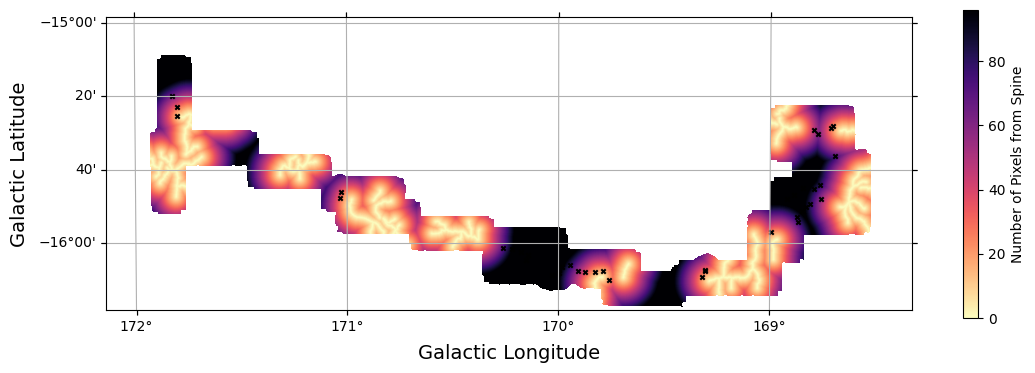

In [28]:
plt.figure(figsize = [13,4])
ax = plt.subplot(projection=wcs_dist_transform, slices=('x', 'y', 0))
cm = plt.cm.get_cmap('magma_r')
dist = plt.imshow(distance_transform_data, origin = 'lower', cmap = cm, vmax = 96)
plt.scatter(pixels_x, pixels_y, s = 10, color = 'black', marker = 'x')
plt.colorbar(dist, label = 'Number of Pixels from Spine')
plt.xlabel('Galactic Longitude', fontsize = 14)
plt.ylabel('Galactic Latitude', fontsize = 14)
plt.grid()
#plt.savefig('Figures/dist_transform+cores.png', transparent=True, bbox_inches = 'tight')
print(np.nanmax(distance_transform_data))

### Take the divergence for each of the smaller subfields

I already have all of the cropped fields as individual fits files. So, open up each of those to see what coordinates they range over, then plot that same region in the distance transform, and from there take the divergence. Plot the divergence field using a quiver plot over the distance transform.

In [26]:
path = 'B10_velocity_posterior.fits'
cube = fits.open(path)
B10_post_data = cube[0].data
header = cube[0].header
#print(header)

wcs_B10 = wcs.WCS(header)

print(wcs_B10)
print(B10_post_data.shape)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SFL' 'GLAT-SFL' 'v' 
CRVAL : np.float64(170.233333333) np.float64(0.0) np.float64(4.1100502434622) 
CRPIX : np.float64(-693.0) np.float64(9601.0) np.float64(0.0) 
PC1_1 PC1_2 PC1_3  : np.float64(1.0) np.float64(0.0) np.float64(0.0) 
PC2_1 PC2_2 PC2_3  : np.float64(0.0) np.float64(1.0) np.float64(0.0) 
PC3_1 PC3_2 PC3_3  : np.float64(0.0) np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-0.001666666707) np.float64(0.001666666707) np.float64(0.020100486924401) 
NAXIS : 169  178  199
(199, 178, 169)


169.03005362073569 168.7184959477109
-16.0000003872 -15.698333713233
1793 1974
184 365


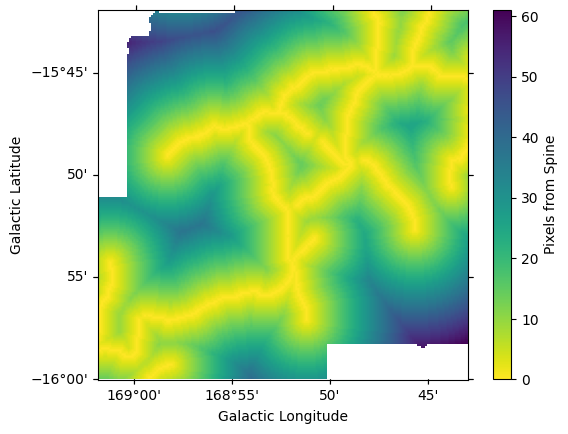

In [27]:
(l_min, b_min, vel), (l_max, b_max, vel) = wcs_B10.wcs_pix2world([[0, 0, 0], [181, 181, 0]], 0)

print(l_min, l_max)
print(b_min, b_max)

(l_min, b_min, vel), (l_max, b_max, vel) = wcs_dist_transform.wcs_world2pix([[l_min, b_min, 0], [l_max, b_max, 0]], 0)

print(round(l_min), round(l_max))
print(round(b_min), round(b_max))

subregion = distance_transform_data[round(b_min):round(b_max), round(l_min):round(l_max)]

ax_1 = plt.subplot(projection = wcs_dist_transform, slices=('x', 'y', 0))
im = ax_1.imshow(distance_transform_data, cmap = 'viridis_r', vmax = np.nanmax(subregion))
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
ax_1.set(xlim=(l_min, l_max), ylim=(b_min, b_max))
cbar = plt.colorbar(im, label = 'Pixels from Spine')

#plt.savefig('Distance_Transform_B10.png', bbox_inches = 'tight')

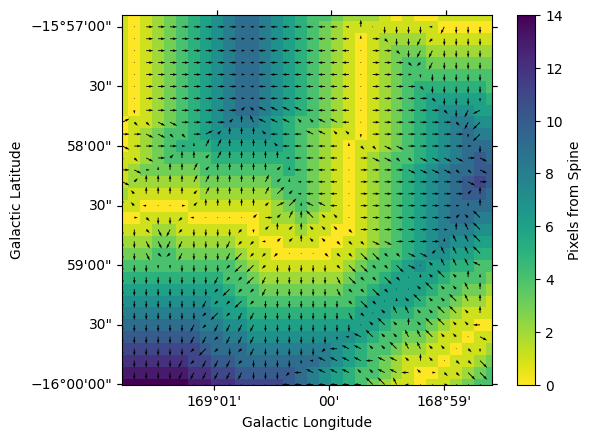

In [28]:
def divergence(scalar_field):
    gx, gy = np.gradient(scalar_field)
    return(gx, gy)

a, b = 150, 150
l, m = 0, 0

subregion = distance_transform_data[round(b_min+m):round(b_max-b), round(l_min+l):round(l_max-a)]
grad_y, grad_x = divergence(subregion) #Flip the order because the coordinates get put in (b, l) and not (l, b)
#print(grad_x)

x = np.arange(round(l_min+l), round(l_max-a), 1)
y = np.arange(round(b_min+m), round(b_max-b), 1)

#x, y = np.meshgrid(x, y, indexing = 'ij', sparse = False)

#plt.figure(figsize = (20, 10))
ax_1 = plt.subplot(projection = wcs_dist_transform, slices=('x', 'y', 0))
im = ax_1.imshow(distance_transform_data, cmap = 'viridis_r', vmax = np.nanmax(subregion))
plt.quiver(x, y, grad_x, grad_y, color = 'black')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
ax_1.set(xlim=(l_min+l, l_max-a), ylim=(b_min+m, b_max-b))
cbar = plt.colorbar(im, label = 'Pixels from Spine')

#plt.savefig('Proof_of_Concept.png', bbox_inches = 'tight')

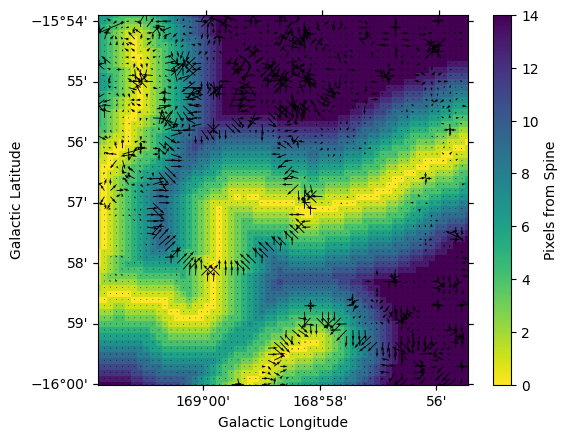

In [28]:
a, b = 120, 120
l, m = 0, 0

vel_subregion = velocity_grid_data[round(b_min+m):round(b_max-b), round(l_min+l):round(l_max-a)]
grad_y, grad_x = divergence(vel_subregion) #Flip the order because the coordinates get put in (b, l) and not (l, b)
#print(grad_x)
#print(grad_y)

x = np.arange(round(l_min+l), round(l_max-a), 1)
y = np.arange(round(b_min+m), round(b_max-b), 1)

#x, y = np.meshgrid(x, y, indexing = 'ij', sparse = False)

#plt.figure(figsize = (20, 10))
ax_1 = plt.subplot(projection = wcs_dist_transform, slices=('x', 'y', 0))
im = ax_1.imshow(distance_transform_data, cmap = 'viridis_r', vmax = np.nanmax(subregion))
plt.quiver(x, y, grad_x, grad_y, color = 'black')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
ax_1.set(xlim=(l_min+l, l_max-a), ylim=(b_min+m, b_max-b))
cbar = plt.colorbar(im, label = 'Pixels from Spine')

plt.savefig('Spines_velocity_gradients.png', bbox_inches = 'tight')